<a href="https://colab.research.google.com/github/athulskrish/pytorch_nn/blob/main/Athul_task2_second.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use this example - https://machinelearningmastery.com/develop-your-first-neural-network-with-pytorch-step-by-step/ to understand pytorch NNs. Augment the dataset by perturbing the data fields with gaussian noise. Train/test/validate. Take a screencast walkthrough of the full code, including your understanding of how the NN is implemented.

In [1]:
#importing the libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.optim as optim
from sklearn.model_selection import train_test_split

torch.manual_seed(0)

In [2]:
# load the dataset, split into input (X) and output (y) variables
dataset = np.loadtxt('/content/drive/MyDrive/datasets/pima-indians-diabetes.csv', delimiter=',')
X = dataset[:,0:8]
y = dataset[:,8] #dividing the data into X,y with X having the 0-8 columns and y having the 9th column

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

X_train,X_test,y_train,y_test=train_test_split(X,y, stratify=y, test_size=0.2,random_state=66) # dividing the data into train and test
X_train,X_val, y_train,y_val=train_test_split(X,y,stratify=y,test_size=0.25, random_state=66) #dividing the 25% of training data into validation data

print(dataset)
print(X.size())
print(y.size())

[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]
torch.Size([768, 8])
torch.Size([768, 1])


In [3]:

# define the model
class PimaClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(8, 12) #first hidden layer with 8 input and 12 outputs
        self.act1 = nn.ReLU() # activation layer of first hidden layer
        self.hidden2 = nn.Linear(12, 8) #2nd hidden layer  with 12 input and 8 output
        self.act2 = nn.ReLU() #activation of second hidden layer
        self.output = nn.Linear(8, 1) #defining output with 8 input and 1 output
        self.act_output = nn.Sigmoid() #using the sigmoid to activate

    def forward(self, x):  #forward movement of the data through the hidden layers
        x = self.act1(self.hidden1(x))
        x = self.act2(self.hidden2(x))
        x = self.act_output(self.output(x))
        return x

model = PimaClassifier() #defining the object model of PimaClassifer
print(model)


PimaClassifier(
  (hidden1): Linear(in_features=8, out_features=12, bias=True)
  (act1): ReLU()
  (hidden2): Linear(in_features=12, out_features=8, bias=True)
  (act2): ReLU()
  (output): Linear(in_features=8, out_features=1, bias=True)
  (act_output): Sigmoid()
)


In [4]:

model = PimaClassifier() #defining the object model of PimaClassifer
print(model)


# train the model
loss_fn   = nn.BCELoss()  # binary cross entropy
optimizer = optim.Adam(model.parameters(), lr=0.001)#using the adam optimizer to optimize the model and defining learning rate

n_epochs = 200
batch_size = 10

losses=[]
val_loss=[]

for epoch in range(n_epochs):
    for i in range(0, len(X_train), batch_size):
        Xbatch = X_train[i:i+batch_size]
        y_pred = model(Xbatch)
        ybatch = y_train[i:i+batch_size]
        loss = loss_fn(y_pred, ybatch)
        losses.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    model.eval()
    with torch.no_grad():
    #  for i in range(0,len(X_val),batch_size):
        # y_batch2=y_val[i:i+batch_size]
        # X_batch2=X_val[i:i+batch_size]
        y_pred2=model(X_val)
        loss2=loss_fn(y_pred2,y_val)
        # optimizer.zero_grad()
        val_loss.append(loss2.item())


print(val_loss)

print(losses)

PimaClassifier(
  (hidden1): Linear(in_features=8, out_features=12, bias=True)
  (act1): ReLU()
  (hidden2): Linear(in_features=12, out_features=8, bias=True)
  (act2): ReLU()
  (output): Linear(in_features=8, out_features=1, bias=True)
  (act_output): Sigmoid()
)
[1.5494657754898071, 0.8366524577140808, 0.7204597592353821, 0.6836040019989014, 0.6652893424034119, 0.6536602973937988, 0.6445595622062683, 0.6381221413612366, 0.6339865326881409, 0.6295379996299744, 0.6249793171882629, 0.623552143573761, 0.6191091537475586, 0.6168949604034424, 0.6118696331977844, 0.6079356074333191, 0.6033653020858765, 0.6014641523361206, 0.5939708352088928, 0.5925743579864502, 0.5868886709213257, 0.5867721438407898, 0.5814804434776306, 0.5773223042488098, 0.578227698802948, 0.5732825398445129, 0.5704171061515808, 0.5729148983955383, 0.5671687126159668, 0.5691790580749512, 0.5637823343276978, 0.5660087466239929, 0.5609489679336548, 0.5588425993919373, 0.5584815144538879, 0.5577138662338257, 0.55631309747695

Accuracy after training

In [5]:

# compute accuracy
y_pred = model(X)
accuracy = (y_pred.round() == y).float().mean()
print(f"Accuracy {accuracy*100}")

# make class predictions with the model
predictions = (model(X) > 0.5).int()
for i in range(5):
    print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

Accuracy 79.296875
[6.0, 148.0, 72.0, 35.0, 0.0, 33.599998474121094, 0.6269999742507935, 50.0] => 1 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.600000381469727, 0.35100001096725464, 31.0] => 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.299999237060547, 0.671999990940094, 32.0] => 1 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.100000381469727, 0.16699999570846558, 21.0] => 0 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.099998474121094, 2.2880001068115234, 33.0] => 1 (expected 1)


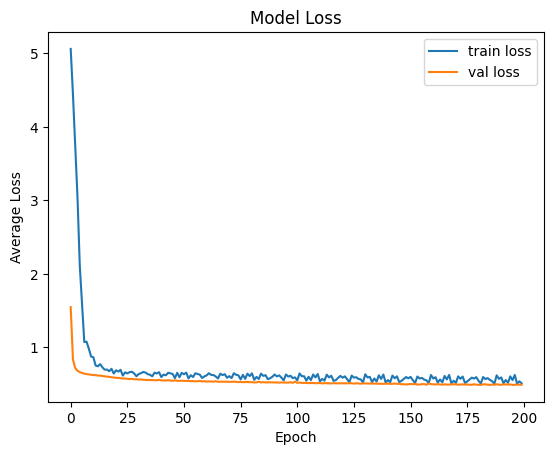

In [6]:
# Calculate the average loss for each epoch
train_epoch_losses = []
# val_losses=[]
for i in range(n_epochs):
    epoch_loss = sum(losses[i*batch_size:(i+1)*batch_size]) / batch_size

    train_epoch_losses.append(epoch_loss)
# epoch_loss=losses.
# Plot the average loss for each epoch
plt.plot(range(n_epochs), train_epoch_losses, label="train loss")
plt.plot(range(n_epochs),val_loss,  label="val loss")
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

Testing data

In [7]:
y_test_pred= model(X_test)
accuracy_test=(y_test_pred.round()==y_test).float().mean()
print(f"Accuracy = {accuracy_test}")



Accuracy = 0.7922077775001526


noisy data

In [8]:
import random
X_deviation=0.3  #defining the deviation
noise_X= torch.randn(tuple(X.size()))*X_deviation  #creating a random data based on the X and Y with deviation
noise_y_tensor=torch.randn(tuple(y.size()))

# X_noisy=X+noise_X
# y_noisy=y+noise_y
# sigmoid=nn.Sigmoid()
print(y_train[:5])
# noise_y=sigmoid(noise_y_tensor)
binary_noise_y = torch.where(noise_y_tensor>= 0.5, torch.tensor(1), torch.tensor(0))


print(binary_noise_y[:10])

tensor([[1.],
        [0.],
        [1.],
        [1.],
        [0.]])
tensor([[0],
        [0],
        [1],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1]])


Appending the noisy data

In [9]:

X_new = torch.cat((X, noise_X.squeeze(0)), dim=0) #concatinating the noisy and data
y_new =torch.cat((y,binary_noise_y.squeeze(0)), dim =0)


# defining  training,validation and testing
train_Xnew,test_Xnew, train_ynew, test_ynew=train_test_split(X_new,y_new,test_size=0.2)
train_Xnew,val_Xnew, train_ynew, val_ynew=train_test_split(train_Xnew,train_ynew, test_size=0.2)


# X_new=random.shuffle(X_new)
print(f"old size= {X.size()}, new size = {X_new.size()}")
print(y_new.size())
y_new=y_new.reshape(-1, 1)

# for y in y_new
#   if y>0.5 :
#   y_new=1
# else:
#   y_new=
print(X_new)
print(y_new)
# print(train_Xnew)
#print(train_ynew)

old size= torch.Size([768, 8]), new size = torch.Size([1536, 8])
torch.Size([1536, 1])
tensor([[ 6.0000e+00,  1.4800e+02,  7.2000e+01,  ...,  3.3600e+01,
          6.2700e-01,  5.0000e+01],
        [ 1.0000e+00,  8.5000e+01,  6.6000e+01,  ...,  2.6600e+01,
          3.5100e-01,  3.1000e+01],
        [ 8.0000e+00,  1.8300e+02,  6.4000e+01,  ...,  2.3300e+01,
          6.7200e-01,  3.2000e+01],
        ...,
        [-4.4285e-01,  2.2512e-01,  1.3479e-01,  ...,  8.7797e-02,
          9.1521e-02, -1.9256e-02],
        [ 3.4742e-01,  2.4200e-01,  1.5665e-01,  ...,  8.3488e-02,
          5.3769e-01,  6.9486e-02],
        [ 3.3822e-01, -1.3859e-01,  3.6266e-01,  ...,  3.2752e-03,
          1.5996e-01,  4.6855e-02]])
tensor([[1.],
        [0.],
        [1.],
        ...,
        [1.],
        [0.],
        [0.]])


In [10]:
new_model= PimaClassifier()
print(new_model)

PimaClassifier(
  (hidden1): Linear(in_features=8, out_features=12, bias=True)
  (act1): ReLU()
  (hidden2): Linear(in_features=12, out_features=8, bias=True)
  (act2): ReLU()
  (output): Linear(in_features=8, out_features=1, bias=True)
  (act_output): Sigmoid()
)


In [11]:
y_pre=new_model(train_Xnew)
print(y_pre[:5])

tensor([[0.9910],
        [0.5732],
        [0.9992],
        [0.5745],
        [0.5693]], grad_fn=<SliceBackward0>)


In [12]:
torch.manual_seed(0)
loss_fn= nn.BCELoss()
optimizer = optim.Adam(new_model.parameters(), lr=0.002,  weight_decay=0.001)#using the adam optimizer to optimize the model and defining learning rate


n_epochs= 100
batch_size=50

new_train_loss=[]
new_val_loss=[]
val_epoch_losses = []
for epoch in range(n_epochs):
  t_loss =0
  v_loss=0

  epoch_val_loss = 0.0
  for i in range(0, len(train_Xnew), batch_size):


    X_batch=train_Xnew[i:i+batch_size]
    y_batch=train_ynew[i:i+batch_size]
    y_pred_new=new_model(X_batch)
    loss_new=loss_fn(y_pred_new, y_batch)
    t_loss+=loss_new.item()

    optimizer.zero_grad()
    loss_new.backward()
    optimizer.step()



  t_loss /= len(train_Xnew)/batch_size
  new_train_loss.append(t_loss)

  model.eval()
  with torch.no_grad():
    #  for i in range(0,len(X_val),batch_size):
        # y_batch2=y_val[i:i+batch_size]
        # X_batch2=X_val[i:i+batch_size]
        y_pred_val=new_model(val_Xnew)
        loss5=loss_fn(y_pred_val,val_ynew)
        # optimizer.zero_grad()
        new_val_loss.append(loss5.item())
  #old vald
  # with torch.no_grad():
  #   y_pred_val= new_model(val_Xnew)
  #   loss3=loss_fn(val_ynew,y_pred_val)
  #   v_loss+=loss3.item()
  # v_loss/=len(val_Xnew)
  # new_val_loss.append(v_loss)

print(new_train_loss)
print(new_val_loss)


[1.1237383920646247, 0.7721518517268894, 0.7120070019224753, 0.6972372531890869, 0.6812982944024313, 0.6689903995898493, 0.6589556450513618, 0.6498001622085415, 0.6408811859832033, 0.6311791340105403, 0.6220739160317267, 0.613244246623181, 0.6060628960186012, 0.6001342626671684, 0.5953004746840102, 0.5916361365080365, 0.5891332027261466, 0.5871198601004063, 0.5855519529394122, 0.5839813128872462, 0.5828124533602759, 0.5818798652491598, 0.5814045151722164, 0.5801896411022683, 0.5798453590292066, 0.5793201871777746, 0.5787228676063708, 0.5780592803556904, 0.5775066081229635, 0.5773142496097354, 0.5765966297167139, 0.5761340457771558, 0.5753442113972487, 0.5748720342661359, 0.5743022939823795, 0.5740298758699064, 0.5738740965208065, 0.573162303558435, 0.572437683761484, 0.5722162437050503, 0.5721460580218833, 0.5714847013930925, 0.5703772158341106, 0.5703934750950264, 0.5695762905593802, 0.5696556430363121, 0.5689163739715234, 0.5683398796074745, 0.5682706241088098, 0.5681096794284773, 0.

In [13]:

y_new_predict= new_model(test_Xnew)
accuracy2= (y_new_predict.round()==test_ynew).float().mean()
print(f"test accuracy = { accuracy2}")


y_new_predict2= new_model(val_Xnew)
accuracy3= (y_new_predict2.round()==val_ynew).float().mean()
print(f"validation accuracy = {accuracy3}")


# make class predictions with the model
predictions = (new_model(test_Xnew) > 0.5).int()
for i in range(5):

    print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

test accuracy = 0.6558441519737244
validation accuracy = 0.6626016497612
[6.0, 148.0, 72.0, 35.0, 0.0, 33.599998474121094, 0.6269999742507935, 50.0] => 0 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.600000381469727, 0.35100001096725464, 31.0] => 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.299999237060547, 0.671999990940094, 32.0] => 0 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.100000381469727, 0.16699999570846558, 21.0] => 1 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.099998474121094, 2.2880001068115234, 33.0] => 1 (expected 1)


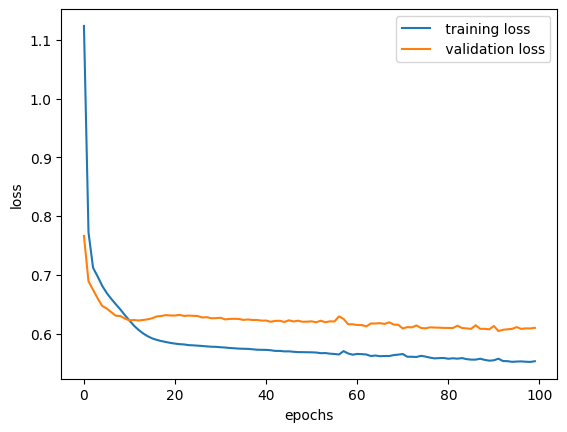

In [14]:

# training_epoch_loss=[]
# for i in range(n_epochs):
#   losses= sum(new_train_loss[i*batch_size:(i+1)*batch_size])/batch_size
#   training_epoch_loss.append(losses)

plt.plot( range(n_epochs),new_train_loss, label=' training loss')
plt.plot( range(n_epochs),new_val_loss, label=' validation loss')
# plt.plot(n_epochs, testing, label='testing')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()



In [15]:
Y_pred_test= new_model(test_Xnew)
accuracy=(Y_pred_test.round()==test_ynew).float().mean()

print(accuracy)

tensor(0.6558)
